In [35]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statistics
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [36]:

df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\Final Project Fantasy Football\wrdata.csv")
# print("DF before KNN Imputation")
# print(df.describe())
df = df.drop(columns = ['name', 'gp_21', 'projected22', 'owners21', 'team21', 'pos21', 'owned22', 'project20', 'actual21', 'passyd_21', 'passtds21', 'int21', 
                        'runyds21', 'runtds21', 'run1st21', 'rec21', 'recyds21', 'rectds21', 'pass1st21', 'returnyds21', 
                       'returntds21', 'twopoint21', 'fumble21', 'pick21', 'salary21', 'project21', 'returnyds20', 'returntd20', 
                       'returnyds19', 'returntd19', 'passyds20', 'passtd20', 'passint20', 'rushyds20', 'rushtd20', 'rush1st20',
                       'passyds19', 'passtd19', 'passint19', 'rushyds19', 'rushtd19', 'rush1st19', 'returnyds19',
                       'returntd19'], axis = 1)

# Define the dependent variable and column names
dependent_variable = 'points21'
#print(df[dependent_variable])
column_names = df.columns.tolist()

important_columns = [column_names]

#IMPUTING WITH KNN
# Specify the number of neighbors 
k_neighbors = 2

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=k_neighbors)

# Perform imputation
df_knn = knn_imputer.fit_transform(df)

# Convert the NumPy array back to a DataFrame
df = pd.DataFrame(df_knn, columns=df.columns)

# Function to identify outliers using IQR
def find_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Identify outliers for each column
outliers_dict = {}
outliers_dependent_var = find_outliers_iqr(df[dependent_variable])

# # Display the DataFrame without outliers in the dependent variable
# print("DataFrame without outliers in the dependent variable:")
# print(df[~outliers_dependent_var].describe())

# #Print the DataFrame with just the outliers
# print("Outliers")
# print(df[outliers_dependent_var].describe())

#Print a summary of the data after imputing
# print("DF After Imputing")
# print(df.describe())

#DF WITH ALL COLUMNS DROPPED
# df_filled = df.dropna()

# Remove rows with outliers in the dependent variable
df = df[~outliers_dependent_var]

X = df.drop(dependent_variable, axis = 'columns')
Y = df[dependent_variable]

print(df.describe())

#get summary of data and save it to a csv file
# df[important_columns].describe().to_csv('SummaryRaw.csv', index = False)
# df_filled[important_columns].describe().to_csv('SummaryFiltered.csv', index= False)



         points21       gp20    points20    actual20   recepts20     recyds20  \
count   97.000000  97.000000   97.000000   97.000000   97.000000    97.000000   
mean   166.414330  14.247423  176.249485  160.443299   51.448454   669.865979   
std     86.914901   2.321911   81.589013  101.442278   26.956706   344.739285   
min     42.910000   5.000000   42.000000    2.000000    4.000000    34.000000   
25%     96.669998  14.000000  111.400000   76.000000   31.000000   413.000000   
50%    151.000000  15.000000  168.530000  156.000000   50.000000   631.000000   
75%    229.390000  16.000000  220.000000  241.000000   67.000000   896.000000   
max    398.530000  16.000000  421.600010  388.000000  127.000000  1535.000000   

         rectd20   rec1st20       pt20   fumble20  ...    owners20  \
count  97.000000  97.000000  97.000000  97.000000  ...   97.000000   
mean    4.365979  33.108247   0.180412   0.304124  ...   45.922680   
std     3.422897  17.695666   0.409430   0.542739  ...   42.

Correlation Matrix:
           points21      gp20  points20  actual20  recepts20  recyds20  \
points21   1.000000  0.095331  0.600635 -0.540939   0.534812  0.497055   
gp20       0.095331  1.000000  0.374552 -0.415088   0.325107  0.338668   
points20   0.600635  0.374552  1.000000 -0.951567   0.928162  0.917285   
actual20  -0.540939 -0.415088 -0.951567  1.000000  -0.896616 -0.882282   
recepts20  0.534812  0.325107  0.928162 -0.896616   1.000000  0.936466   
recyds20   0.497055  0.338668  0.917285 -0.882282   0.936466  1.000000   
rectd20    0.490765  0.267986  0.841936 -0.760723   0.698818  0.736004   
rec1st20   0.492136  0.311301  0.925714 -0.896185   0.962346  0.973358   
pt20       0.118448  0.105958  0.197196 -0.222964   0.200702  0.209249   
fumble20   0.127640  0.202111  0.279675 -0.266690   0.232122  0.182787   
pick20    -0.235693  0.073361 -0.381535  0.291110  -0.269467 -0.248726   
salary20   0.259245 -0.137114  0.398315 -0.256938   0.275039  0.279413   
gp19       0.18226

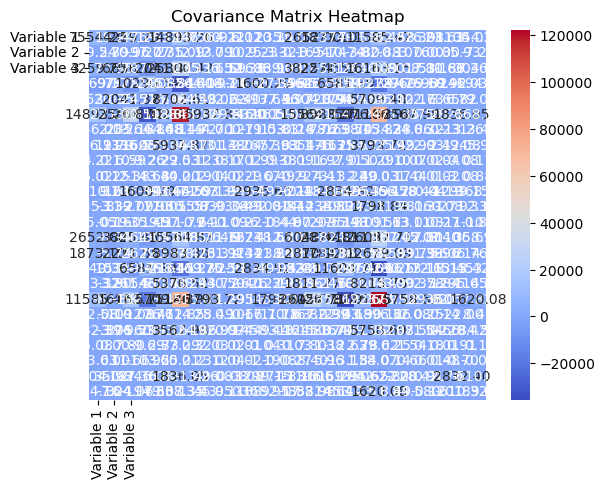

VIF Table:
     Variable         VIF
0        gp20   66.581761
1    points20  267.717200
2    actual20   52.189856
3   recepts20  118.121162
4    recyds20  136.352166
5     rectd20   17.445145
6    rec1st20  176.972992
7        pt20    1.542729
8    fumble20    1.822657
9      pick20   32.947728
10   salary20   23.041167
11       gp19   64.286766
12   points19  318.205304
13   owners20   18.693340
14   actual19   89.711251
15  recepts19  107.365260
16   recyds19  184.382437
17    rectd19   24.241266
18   rec1st19  257.445185
19       pt19    2.001265
20   fumble19    2.227792
21     pick19   27.622813
22   salary19   15.526013


In [37]:

#Calculate the correlation matrix for all the independent variables, then narrow it down to X independent variables
correlation_matrix = df.corr()
correlation_X = df.corr()
print("Correlation Matrix:")
print(correlation_X)

#Calculate the covariance matrix, then narrowed down to X independent variables
numpy = df.to_numpy()
numpy_X = df.to_numpy()
covariance_matrix = np.cov(numpy_X, rowvar=False)
# Create a heatmap of the covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Variable 1', 'Variable 2', 'Variable 3'],
            yticklabels=['Variable 1', 'Variable 2', 'Variable 3'])
# Add labels and title
plt.title('Covariance Matrix Heatmap')
plt.show()

#Calculate the Variance Inflation Matrix(VIF) to find any multicollinearity
important_dfilled = df.drop(dependent_variable, axis = 'columns')
variables = important_dfilled.values
vif_values = [variance_inflation_factor(variables, i) for i in range(important_dfilled.shape[1])]
# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': important_dfilled.columns, 'VIF': vif_values})
print("VIF Table:")
print(vif_df)


In [38]:
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=30)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Mean Squared Error: 6202.7636727947065
Mean Squared Error on Training Data: 5054.385412864688
Mean Squared Error on Test Data: 3762.0931376497865
R-squared: 0.5372763855724187


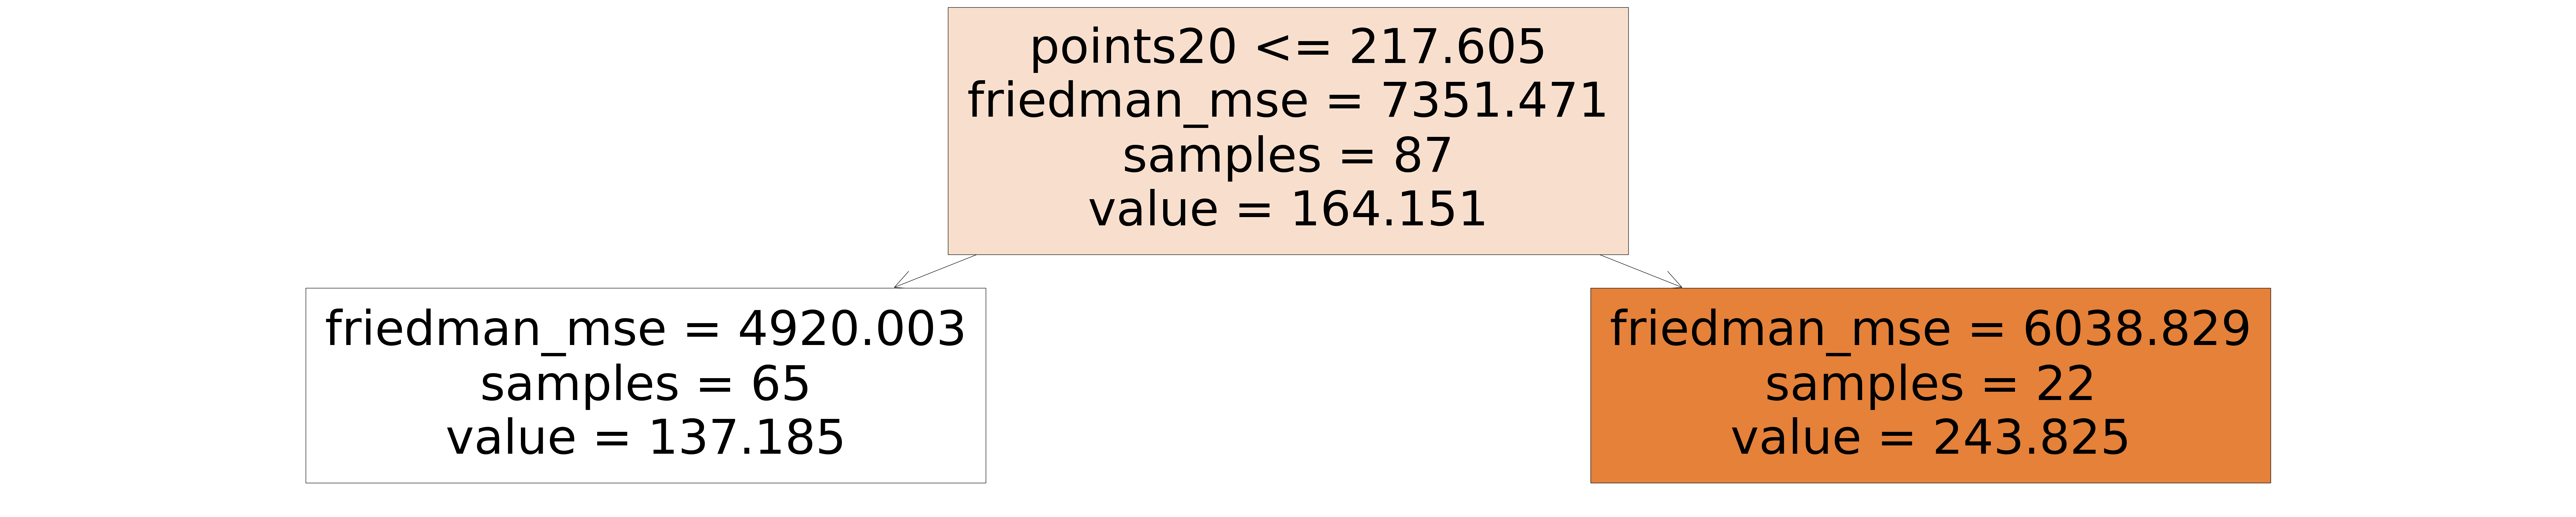

In [39]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = list(X.columns),  filled = True)
plt.show()

In [40]:
#PCA with all variables passed in
X_standardized = StandardScaler().fit_transform(X)
# Create a PCA instance
n = 10
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)
#print(pc_df)
# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
#final_df = pd.concat([df, pc_df], axis=1) # Add 'target' if available
# print(final_df)

Variance explained by each latent variable in PCA:  [0.45963377 0.1397351  0.08309271 0.05253903 0.04894552 0.04238047
 0.03668679 0.03220114 0.0266922  0.02044099]
   Explained Variance  Cumulative Explained Variance
0           10.681697                      10.681697
1            3.247386                      13.929083
2            1.931040                      15.860123
3            1.220985                      17.081108
4            1.137473                      18.218581
5            0.984904                      19.203486
6            0.852586                      20.056072
7            0.748341                      20.804413
8            0.620316                      21.424728
9            0.475040                      21.899768


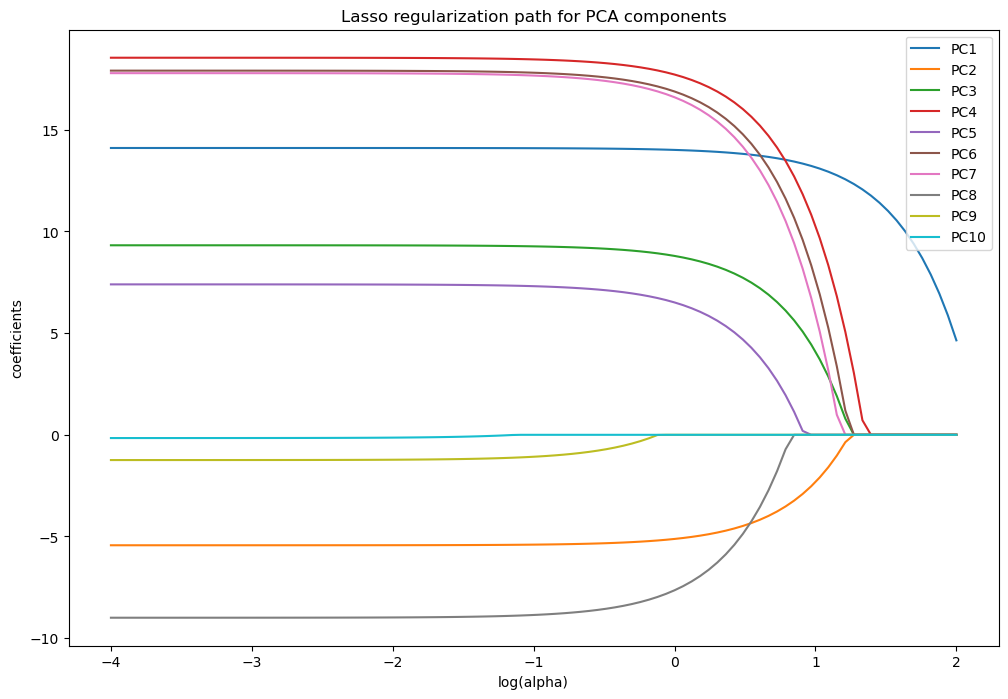

In [41]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(principal_components, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [42]:
#Lasso model with the PCA components
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(principal_components))  

# Fit the LassoCV model on the data
lasso_cv_model.fit(principal_components, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an array to store predictions
predictions = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(principal_components):
    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction
    predictions.append(y_pred[0])

# Calculate the mean squared error
mse = mean_squared_error(Y, predictions)

# Calculate R-squared for this alpha
r2 = r2_score(Y, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f}'
equation += ' + '
equation += ' + '.join([f'{coef:.4f} * PC{i + 1}' for i, coef in enumerate(lasso_model.coef_)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse}')
print(f'R-Squared: {r2}')
print(f'Equation: {equation}')

Optimal Alpha: 1.8383
Mean Squared Error (Lasso + LOOCV): 5020.229402085309
R-Squared: 0.3285161311710262
Equation: y = 166.8778 + 13.7571 * PC1 + -4.9885 * PC2 + 8.2240 * PC3 + 16.9319 * PC4 + 5.5394 * PC5 + 15.9937 * PC6 + 15.5230 * PC7 + -6.8263 * PC8 + -0.0000 * PC9 + 0.0000 * PC10


In [43]:
#Linear Regression with all PCA components
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training Mean Squared Error: 3600.45365034972
Training R-squared: 0.5349540276764512
Coefficients: [14.19795956 -6.47132766 13.81467041 19.77830864 -1.13271231 16.35572707
 16.25341514 -8.57307152 -4.96644399  4.92644405]
Intercept: 165.98218211767536


In [46]:
#PCA with receptions
rec_columns = ['recepts20', 'recyds20', 'rectd20', 'rec1st20', 'recepts19', 'recyds19', 'rectd19', 'rec1st19']
X_standardized = StandardScaler().fit_transform(X[rec_columns])

# Create a PCA instance
n = 3
pca_rec = PCA(n_components=n) 
pca_rec.fit(X_standardized)
# Fit the PCA model to the standardized data
rec_pc = pca_rec.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['recPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
rec_df = pd.DataFrame(data=rec_pc, columns=pc_columns)

#print(passing_df)
rec_columns_to_add = rec_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_rec.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_rec.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, rec_df[rec_columns_to_add]], axis=1) 
for column in rec_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.72710451 0.15878502 0.05906586]
   Explained Variance  Cumulative Explained Variance
0            5.877428                       5.877428
1            1.283512                       7.160940
2            0.477449                       7.638389
     points21  gp20    points20  actual20  pt20  fumble20  pick20  salary20  \
0   176.13000  16.0  327.899990      18.0   0.0       2.0    24.0      36.0   
1   171.53000  16.0  131.870000     200.0   0.0       0.0    67.0      13.0   
2   246.70000  16.0  211.370000      90.0   0.0       0.0    98.0      10.0   
3   112.97000  11.0   62.270000     346.0   0.0       0.0    43.0      24.0   
4    73.93000  16.0  126.770000     214.0   0.0       0.0   111.5      10.0   
..        ...   ...         ...       ...   ...       ...     ...       ...   
94  313.00000  16.0  296.070010      31.0   0.0       0.0    35.0      28.0   
95  161.67000  16.0  276.899990      39.0   0.0       1.0    78.0    

In [45]:
handpicked_df = df[['recPC1', 'recPC2', 'recPC3', 'owners20', 'points20', 'points19']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(handpicked_df, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [98, 97]

In [ ]:
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(handpicked_df), random_state=42)

# Fit the LassoCV model on the data
lasso_cv_model.fit(handpicked_df, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize arrays to store results
predictions = []
true_values = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(handpicked_df):
    X_train, X_test = handpicked_df.iloc[train_index], handpicked_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction and true value
    predictions.append(y_pred[0])
    true_values.append(y_test.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(true_values, predictions)

# Calculate R-squared
r2 = r2_score(true_values, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f} + ' + ' + '.join([f'{coef:.4f} * {col}' for coef, col in zip(lasso_model.coef_, handpicked_df.columns)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Equation: {equation}')




In [ ]:

# # Plot y-values against indices
# plt.plot(Y, marker='o')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Y-values')
# plt.title('One-Dimensional Plot of Y-values')

# # Show the plot
# plt.show()

# # Create scatter plots for each column with respect to the dependent variable
# for column in column_names:
#    plt.figure(figsize=(8, 6))
#    plt.scatter(df[column], df[dependent_variable], alpha=0.5)
#    plt.title(f'Scatter Plot of {column} vs. {dependent_variable}')
#    plt.xlabel(column)
#    plt.ylabel(dependent_variable)
#    plt.grid(True)
# #   plt.savefig(f'plot_{column}.png', dpi=300)
#    plt.show()

In [ ]:
#Create LINEAR REGRESSION MODEL FROM OLS
x = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Get the coefficients and variable names
coefficientsOLS = model.params  # Include the intercept
variable_names = X
equation = " + ".join(f"{b:.4f}*{var}" for b, var in zip(coefficientsOLS, variable_names))
print(model.summary())